# Sprint 5 - 2 

### Reviso set de datos para familiarizarme con él. 

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
cabecera = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
HData = pd.read_csv('C:\\Juan\\ITAcademy\\Sprint_5\\housing data.csv', encoding='ISO-8859-1', 
                    header = None, names = cabecera)

In [25]:
HData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
HData.shape

(506, 14)

In [27]:
HData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [28]:
HData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
HData.duplicated().sum()

0

#### Explicación variables

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per USD 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in USD 1000's

# Ejercicio 1

- Separo el conjunto de datos en 80% al train y 20% al test. 

In [30]:
HData_train, HData_test = train_test_split(HData, test_size = 0.20, random_state=42)
print("Ejemplos usados para entrenar: ", len(HData_train))
print("Ejemplos usados para test: ", len(HData_test))

Ejemplos usados para entrenar:  404
Ejemplos usados para test:  102


- Hago la descripción estadística para el set de datos original y para test y train bajo la idea de ver si tienen una distribución similar. 

In [31]:
round(HData.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [32]:
round(HData_train.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.61,11.57,10.99,0.07,0.56,6.32,68.56,3.81,9.36,404.03,18.32,356.28,12.46,22.80
std,8.88,23.15,6.89,0.26,0.12,0.71,27.99,2.13,8.59,166.17,2.23,91.57,7.11,9.33
min,0.01,0.00,0.74,0.00,0.38,3.86,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.89,45.55,2.09,4.00,279.00,16.80,375.47,6.77,16.95
50%,0.26,0.00,8.56,0.00,0.54,6.21,77.70,3.18,5.00,330.00,18.70,391.30,10.92,21.60
75%,3.20,20.00,18.10,0.00,0.63,6.64,93.65,5.40,12.00,666.00,20.20,395.76,16.37,26.40
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [33]:
round(HData_test.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.0,102.00,102.00,102.00
mean,3.63,10.55,11.74,0.06,0.55,6.16,68.65,3.74,10.31,424.89,19.0,358.24,13.43,21.49
std,7.46,24.08,6.72,0.24,0.11,0.66,28.89,2.01,9.16,177.46,1.8,90.64,7.24,8.61
min,0.01,0.00,0.46,0.00,0.39,3.56,6.20,1.17,1.00,188.00,13.0,6.68,2.88,5.00
25%,0.09,0.00,6.10,0.00,0.45,5.87,43.80,2.26,4.00,281.75,18.4,375.02,7.69,17.12
50%,0.21,0.00,10.59,0.00,0.53,6.17,74.70,3.35,5.00,345.00,19.2,392.21,12.34,20.15
75%,4.52,0.00,18.10,0.00,0.62,6.48,95.22,4.76,24.00,666.00,20.2,396.90,18.02,24.08
max,45.75,95.00,27.74,1.00,0.87,8.03,100.00,10.71,24.00,711.00,22.0,396.90,36.98,50.00


- Con los datos descrptivos veo que la mayoría de variables mantienen distribuciones parecidas por su disperción y tendencia central. Me hacen dudar CRIM, TAX y LSTAT por lo que observaré sus gráficos de dispersión para cada conjunto de datos. 

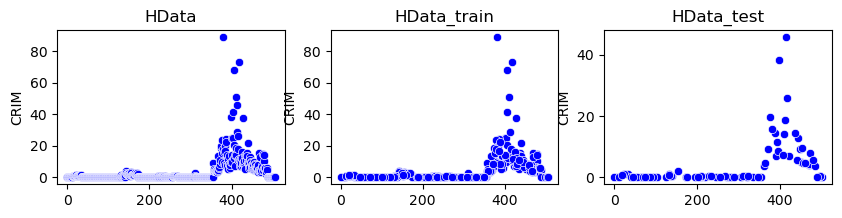

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
sns.scatterplot(HData['CRIM'], ax=axes[0],color= 'b').set_title("HData")
sns.scatterplot(HData_train['CRIM'], ax=axes[1],color= 'b').set_title("HData_train")
sns.scatterplot(HData_test['CRIM'], ax=axes[2],color= 'b').set_title("HData_test")
plt.show()

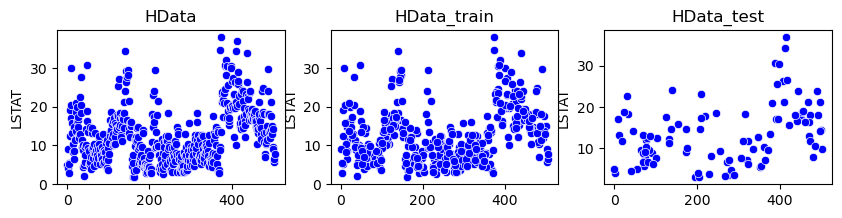

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
sns.scatterplot(HData['LSTAT'], ax=axes[0],color= 'b').set_title("HData")
sns.scatterplot(HData_train['LSTAT'], ax=axes[1],color= 'b').set_title("HData_train")
sns.scatterplot(HData_test['LSTAT'], ax=axes[2],color= 'b').set_title("HData_test")
plt.show()

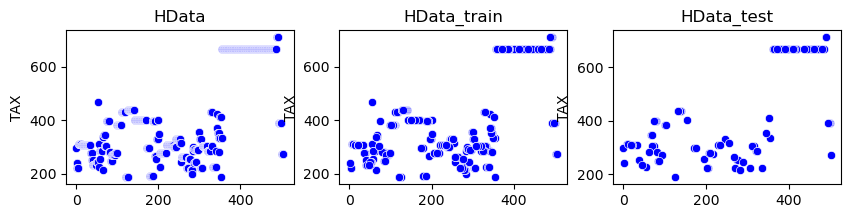

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
sns.scatterplot(HData['TAX'], ax=axes[0],color= 'b').set_title("HData")
sns.scatterplot(HData_train['TAX'], ax=axes[1],color= 'b').set_title("HData_train")
sns.scatterplot(HData_test['TAX'], ax=axes[2],color= 'b').set_title("HData_test")
plt.show()

- Viendo los gráficos de dispersión considero que las tres variables duda (CRIM, TAX y LSTAT) son muy parecidas en los tres sets de datos. 
- Observando estos comportamientos, verifico que los conjuntos de datos test y train son muy parecidos al set original por lo que son buenos para mi modelo. 

# Ejercicio 2

 - Hago una transformación a dummy de la variable RAD (Índice de accesibilidad a autopistas radiales) que denominaré RADD en una nueva columna. Esta transfomación es más por hacer el ejercicio que por la información que nos aporta. En todo caso se podría interpretar como "0": quienes tienen un acceso bajo a las autopistas radiales y "1": quienes tienen acceso alto a las autopistas radiales. 

In [38]:
HData_T = HData
HData_T['RADD'] = HData_T['RAD'].apply(lambda x:1 if x >=5 else 0)
HData_T['RADD'].unique()

array([0, 1], dtype=int64)

- Voy a normalizar la variable RM (media de habitaciones por vivienda) con la escalado min-max. Esta variable presenta muchos datos atípicos y con el escalado los dejo entre 0 y 1.  

In [39]:
min_max_scaler = MinMaxScaler()
valores = HData_T[['RM']]
scaled_values = min_max_scaler.fit(valores)
RM_MinMax = min_max_scaler.transform(valores)
HData_T['RM_MinMax']=RM_MinMax

- La variable TAX (valor total de la tasa de impuestos a la propiedad por 10,000 USD) tiene una escala mayor a casi todo el resto del set de datos y la voy a estandarizar.

In [40]:
standard_scaler = StandardScaler()
valores = HData_T[['TAX']]
scaled_values = standard_scaler.fit(valores)
TAX_S = standard_scaler.transform(valores)
HData_T['TAX_S']=TAX_S

- El gráfico scatter de la variable CRIM (tasa de crímen per cápita) sugiere que se ajustaría mejor a una escala cuadrática que a una lineal, por ello le aplicaré una transformación polinómica. 

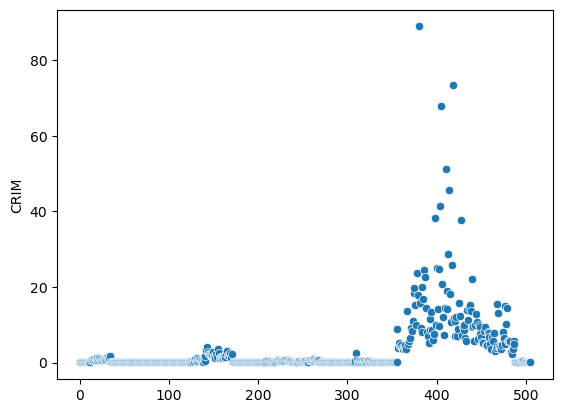

In [41]:
sns.scatterplot(HData['CRIM'])
plt.show()

In [42]:
x = np.array(HData_T['CRIM'])
poli = PolynomialFeatures(degree=2, include_bias=False)
CRIM_poly = poli.fit_transform(x.reshape(-1,1))
CRIM_poly[:5]

array([[6.3200000e-03, 3.9942400e-05],
       [2.7310000e-02, 7.4583610e-04],
       [2.7290000e-02, 7.4474410e-04],
       [3.2370000e-02, 1.0478169e-03],
       [6.9050000e-02, 4.7679025e-03]])

In [43]:
CRIM_polyDF = pd.DataFrame(CRIM_poly, columns=['CRIM_O','CRIM_T'])
HData_T['CRIM_T']=CRIM_polyDF['CRIM_T']

- El set de datos con las variables transformadas queda como sigue:

In [44]:
HData_T.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RADD,RM_MinMax,TAX_S,CRIM_T
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,0.577505,-0.666608,0.000040
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0.547998,-0.987329,0.000746
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,0.694386,-0.987329,0.000745
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,0.658555,-1.106115,0.001048
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,0.687105,-1.106115,0.004768


# Ejercicio 3

- Descripción estadística y gráfica de las variables transformadas. 

In [21]:
HData_T[['RADD','RM_MinMax','TAX_S','CRIM_T','CRIM']].describe()

,RADD,RM_MinMax,TAX_S,CRIM_T,CRIM
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.620553,0.521869,0.000000,86.897912,3.613524
std,0.485730,0.134627,1.000990,513.258198,8.601545
min,0.000000,0.000000,-1.313990,0.000040,0.006320
25%,0.000000,0.445392,-0.767576,0.006731,0.082045
50%,1.000000,0.507281,-0.464673,0.065804,0.256510
75%,1.000000,0.586798,1.530926,13.520940,3.677083
max,1.000000,1.000000,1.798194,7916.764166,88.976200


- Las variables RADD y RM_MinMax tienen mínimo de 0 y máximo de 1 ya que la primera fue transformada en dummy y la segunda en un intervalo de 0 a 1. TAX_S fue estandarizada por lo que tiene una media de 0 y una desviación stándar de 1. CRIM_T al sufrir una transformación cuadrática de CRIM, ha maginificado sus registros. 

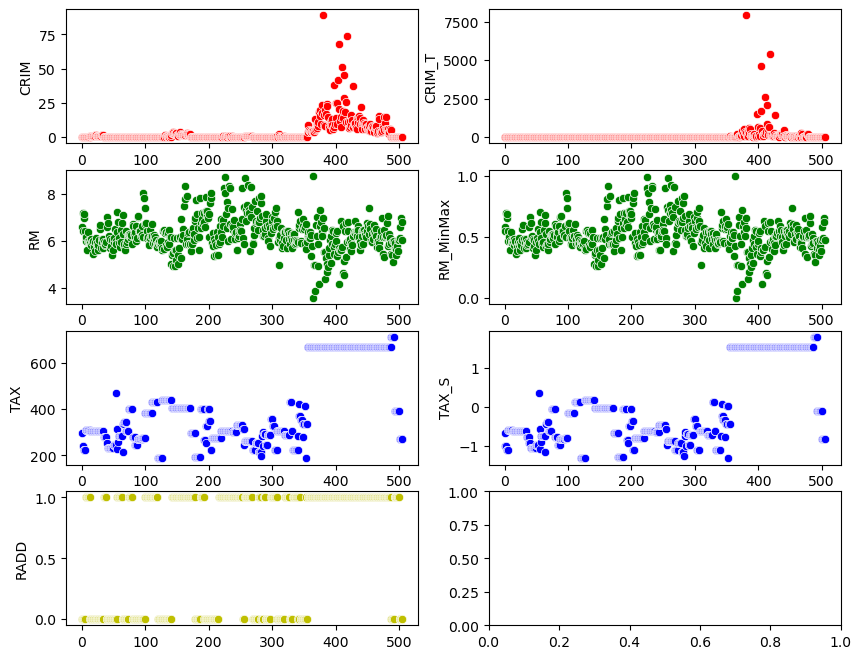

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))
sns.scatterplot(HData_T['CRIM'], ax=axes[0,0],color= 'r')
sns.scatterplot(HData_T['CRIM_T'], ax=axes[0,1],color= 'r')
sns.scatterplot(HData_T['RADD'], ax=axes[3,0], color='y')
sns.scatterplot(HData_T['RM_MinMax'], ax=axes[1,1], color='g')
sns.scatterplot(HData_T['RM'], ax=axes[1,0], color='g')
sns.scatterplot(HData_T['TAX_S'], ax=axes[2,1], color='b')
sns.scatterplot(HData_T['TAX'], ax=axes[2,0], color='b')
plt.show()

- La distribución de las observaciones en los gráficos de dispersión de CRIM y CRIM_T (CRIM transformada) son similares. Como esperábamos, lo que cambia es la escala debido a la transformación cuadrática de la variable. 
- La variable RM también muestra una distribución de valores similar a RM_MinMax en los gráficos de dispersión. Lo que cambia es la escala, que en la variable transformada, pasa a un rango comprendido entre 0 y 1 propio del método min-max.
- También como esperábamos, la variable transformada de RAD, RADD, sólo toma valores 0 y 1 ya que ahora es una variable dummy.
- El objetivo de estandarizar la variable TAX era reducir su escala. Al ver el gráfico de disperción de TAX_S (TAX transformada) se observa que prácticamente todas sus observaciones se encuentran entre -1 y 1, mientras que en la variable original se encontraban entre 200 y 600. 